## **ABOUT DATASET**

## It is the dataset of a U.S. bank customer for getting the information that , this particular customer will leave bank or not.

## **IMPORTING LIBRARIES**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as seabornInstance
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
%matplotlib inline

In [ ]:
dataset=pd.read_csv('/content/Churn_Modelling.csv')

## **DATA PRE-PROCESSING**

In [ ]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
dataset.drop(columns = ['RowNumber','CustomerId','Surname'], inplace= True )

In [ ]:
dataset.shape

(10000, 11)

In [ ]:
dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
dataset.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [ ]:
# Convert catagorical variables to numeric using get_dummies.

x=dataset[['CreditScore']+['Geography']+['Gender']+['Age']+['Tenure']+['Balance']+['NumOfProducts']+['HasCrCard']+['IsActiveMember']+['EstimatedSalary']]

y=dataset['Exited']

# encode with get dummies
X_dummies = pd.get_dummies(x,drop_first = True)

In [ ]:
X_dummies.corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,0.005538,0.004780,-0.002857
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.046897,-0.001685,-0.027544
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.000567,0.003868,0.014733
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.401110,-0.134892,0.012087
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.010419,0.009039,-0.021859
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,0.010577,-0.013480,0.005766
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.020486,0.016732,0.022544
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.010297,-0.006482,-0.008112
Geography_Germany,0.005538,0.046897,-0.000567,0.401110,-0.010419,0.010577,-0.020486,0.010297,1.000000,-0.332084,-0.024628
Geography_Spain,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.332084,1.000000,0.016889


## **DATA VISUALIZATION**

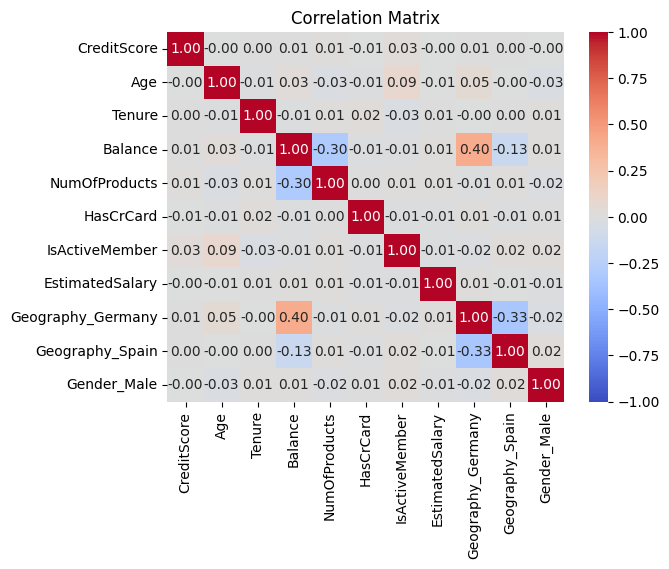

In [ ]:
seabornInstance.heatmap(X_dummies.corr(), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

<ipython-input-12-32831a78c5ba>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  seabornInstance.countplot(x="Exited",data=dataset,palette=["coral","teal"])


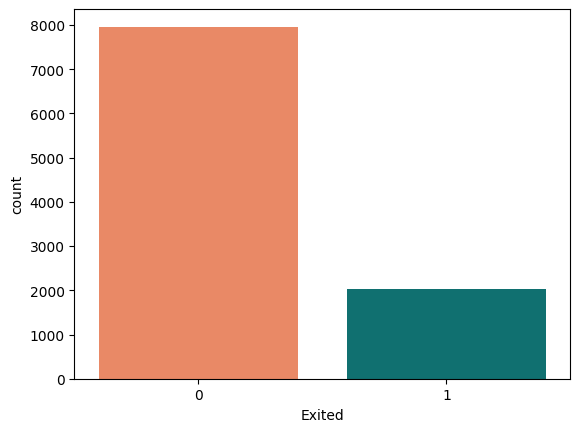

In [ ]:
seabornInstance.countplot(x="Exited",data=dataset,palette=["coral","teal"])
plt.show()

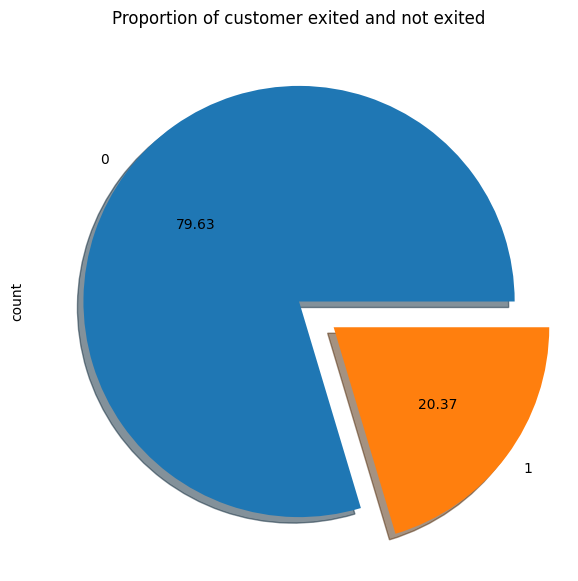

In [ ]:
value_counts = pd.value_counts(dataset['Exited'])
plt.figure(figsize = (7,7))
value_counts.plot(kind = 'pie', explode = [0,0.2],autopct='%.2f', shadow=True)
plt.title('Proportion of customer exited and not exited')
plt.show()

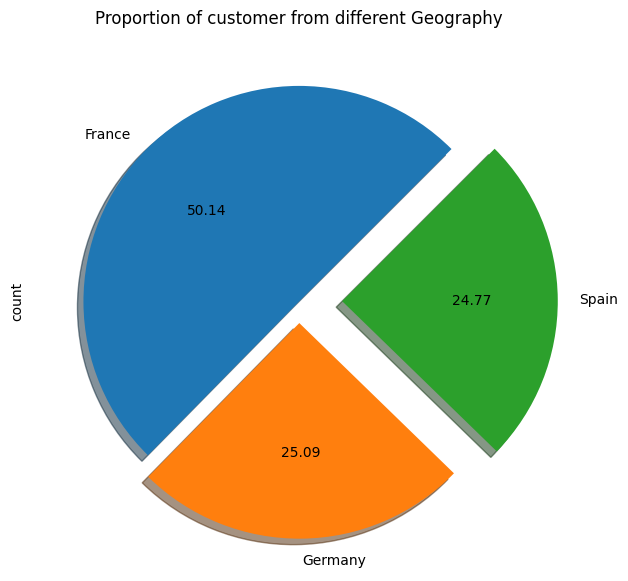

In [ ]:
value_counts = pd.value_counts(dataset['Geography'])
plt.figure(figsize = (7,7))
value_counts.plot(kind = 'pie', explode = [0,0.1,0.2],autopct='%.2f', shadow=True,startangle=45)
plt.title('Proportion of customer from different Geography')
plt.show()

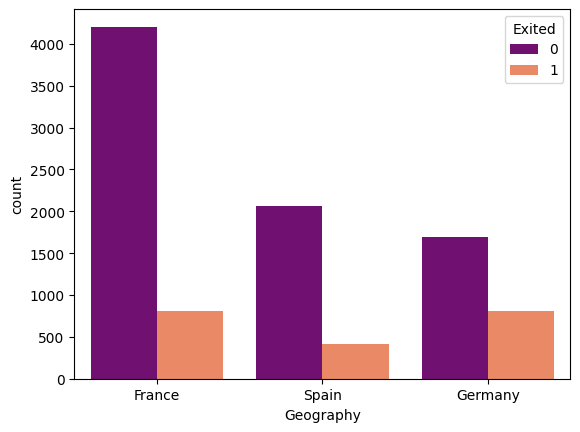

Exited,0,1
Geography,,
France,4204,810
Germany,1695,814
Spain,2064,413


In [ ]:
seabornInstance.countplot(x="Geography",hue="Exited",palette=["purple","coral"],data=dataset)
plt.show()
pd.crosstab(dataset["Geography"],dataset["Exited"])

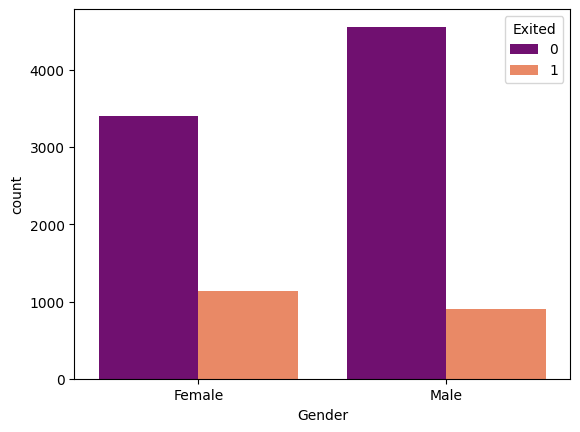

Exited,0,1
Gender,,
Female,3404,1139
Male,4559,898


In [ ]:
seabornInstance.countplot(x="Gender",hue="Exited",palette=["purple","coral"],data=dataset)
plt.show()
pd.crosstab(dataset["Gender"],dataset["Exited"])

<Axes: xlabel='Age', ylabel='Balance'>

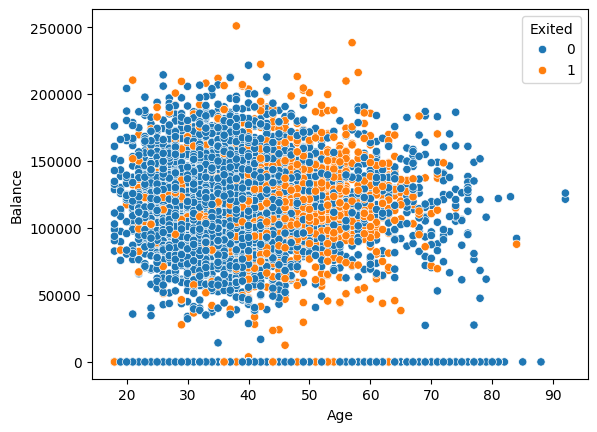

In [ ]:
seabornInstance.scatterplot(x ="Age", y ="Balance", hue ="Exited", data = dataset)

In [ ]:
df=pd.get_dummies(columns=["Geography","Gender"],data=dataset)


## **EXTRACTING DEPENDENT AND INDEPENDENT VARIABLE**

In [ ]:
x=df.drop("Exited",axis=1)
y=df["Exited"]

## **SPLITTING THE DATASET INTO TRAINING AND TEST DATA**

In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0)
#feature Scaling
st_x= StandardScaler()
x_train= st_x.fit_transform(x_train)
x_test= st_x.transform(x_test)

## **LOGISTIC REGRESSION**

In [ ]:
classifier= LogisticRegression(random_state=0)
classifier.fit(x_train, y_train)
classifier

LogisticRegression(random_state=0)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
predictions=lr.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

[[1901   90]
 [ 393  116]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1991
           1       0.56      0.23      0.32       509

    accuracy                           0.81      2500
   macro avg       0.70      0.59      0.61      2500
weighted avg       0.77      0.81      0.77      2500

0.8068


## **RANDOM FOREST ALOGRITHM**

In [ ]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(x_train, y_train)
classifier

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
predictions=rf.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

[[1917   74]
 [ 249  260]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1991
           1       0.78      0.51      0.62       509

    accuracy                           0.87      2500
   macro avg       0.83      0.74      0.77      2500
weighted avg       0.86      0.87      0.86      2500

0.8708


## **GRADIENT BOOSTING**

In [ ]:
classifier=GradientBoostingClassifier(learning_rate=0.5)
classifier.fit(x_train, y_train)
classifier

GradientBoostingClassifier(learning_rate=0.5)

In [ ]:
y_pred= classifier.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
predictions=gb.predict(x_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print(accuracy_score(y_test,predictions))

[[1906   85]
 [ 246  263]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92      1991
           1       0.76      0.52      0.61       509

    accuracy                           0.87      2500
   macro avg       0.82      0.74      0.77      2500
weighted avg       0.86      0.87      0.86      2500

0.8676
